In [ ]:
! pip install imageio

In [ ]:
! pip install matplotlib.pyplot as plt

In [ ]:
! pip install numpy as np

In [83]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [84]:
pic = 'snow_jpgs/snow1.2.jpg'

In [85]:
def list_files_local(path):
    """ Get file list form local folder. """
    from glob import glob
    return glob(path)

In [86]:
snow_pics1 = list_files_local('snow_day1/*')
snow_pics2 = list_files_local('snow_day2/*')

In [87]:
snow_pics1

['snow_day1\\snow2.jpg',
 'snow_day1\\snow3.jpg',
 'snow_day1\\snow4.jpg',
 'snow_day1\\snow5.jpg',
 'snow_day1\\snow6.jpg']

C:\Users\annav\AppData\Local\Temp\ipykernel_2888\2864540246.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = imageio.imread(snow_pics1[0])


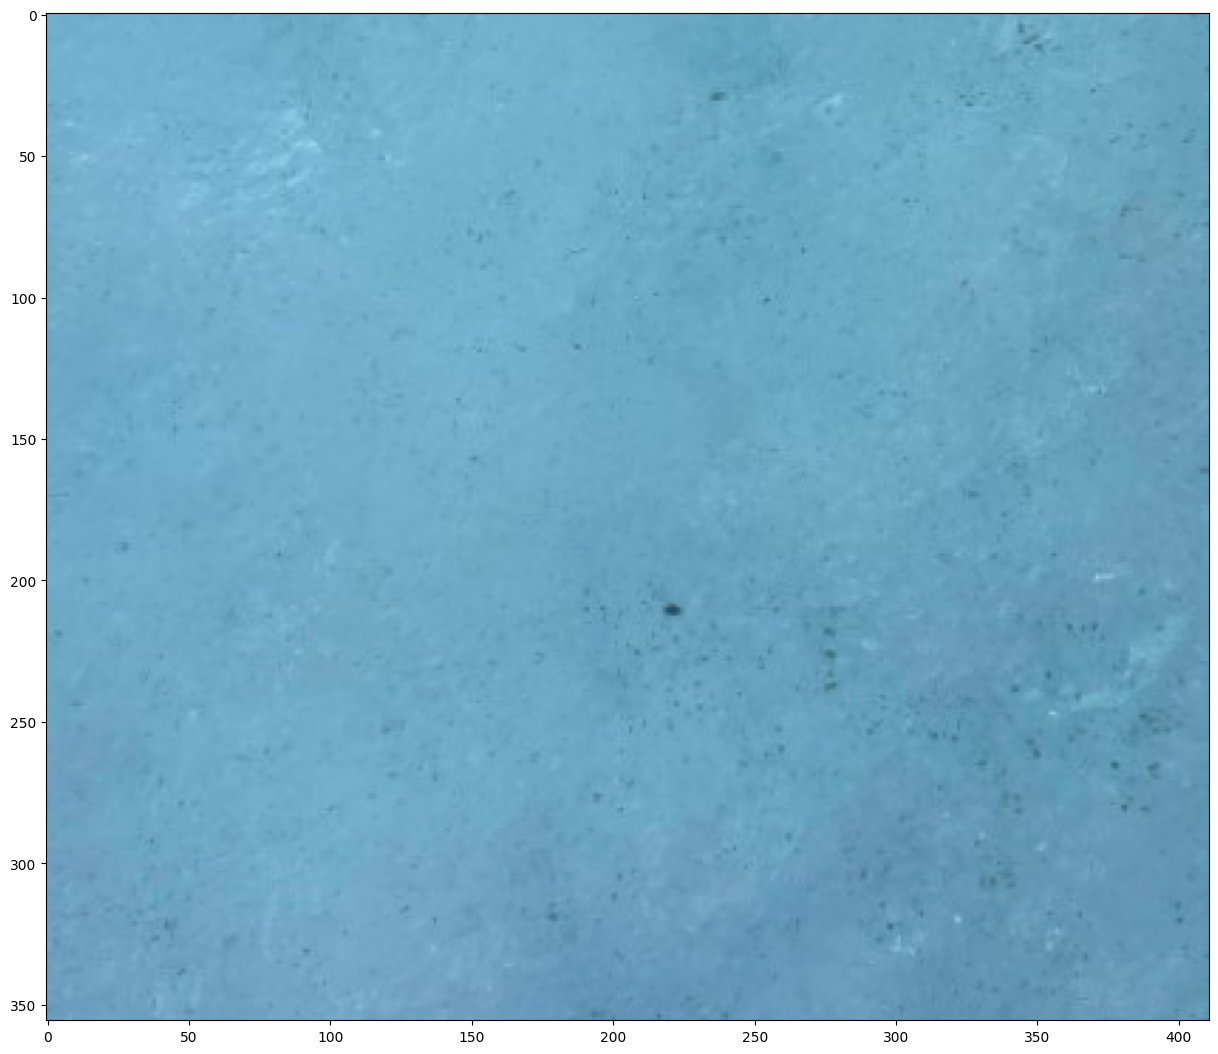

In [88]:
pic = imageio.imread(snow_pics1[0])
plt.figure(figsize = (15,15))

plt.imshow(pic)

In [89]:
### go through and for each find the luminance: 
def function(picture_list):
    blue_list = []
    lum_list = []
    for img in picture_list: 
        pic = imageio.imread(img)

        ### let's make arrays for R, G, and B: 
        RED = pic[ : , : , 0] /255
        BLUE = pic[ : , : , 1] /255
        GREEN = pic[ : , : , 2] /255

        LUMINANCE = (0.2126*RED + 0.7152*GREEN + 0.0722*BLUE)

        lum = np.asarray(LUMINANCE)
        blu = np.asarray(BLUE)
        L_value =np.sum(lum)
        blueness = np.sum(blu)

        lum_list.append(L_value / (pic.shape[0]*pic.shape[1]))
        blue_list.append(blueness/ (pic.shape[0]*pic.shape[1])) 
        
    return lum_list, blue_list

In [91]:
## call our function: 

### day 1:
luminance_day1, blue_day1 = function(snow_pics1)

### day 2:
luminance_day2, blue_day2 = function(snow_pics2)

C:\Users\annav\AppData\Local\Temp\ipykernel_2888\1513347442.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic = imageio.imread(img)


In [76]:
### albedo array: 
albedo_day1 = [ 0.27, 0.1, 0.22, 0.11, 0.06]
albedo_day2 = [0.28, 0.31, 0.25, 0.09, 0.11, 0.11, 0.09, 0.15]

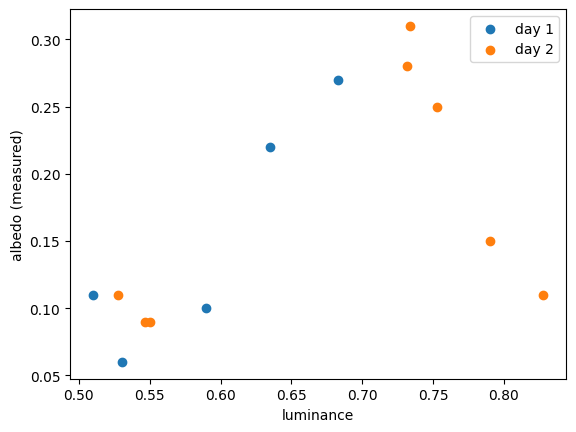

In [92]:
plt.scatter(luminance_day1, albedo_day1, label= 'day 1')
plt.scatter(luminance_day2, albedo_day2, label= 'day 2')
plt.xlabel("luminance")
plt.ylabel("albedo (measured)")
plt.legend()

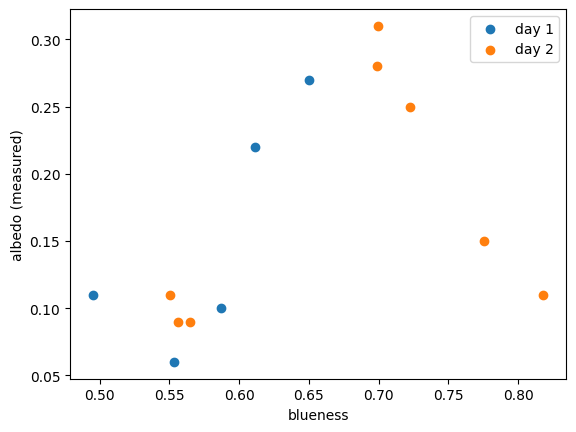

In [94]:
plt.scatter(blue_day1, albedo_day1, label= 'day 1')
plt.scatter(blue_day2, albedo_day2, label= 'day 2')
plt.xlabel("blueness")
plt.ylabel("albedo (measured)")
plt.legend()

In [95]:
#### maybe do a line of best fit? 

In [96]:
!conda env export > environment_drop.yml